## Import the dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load and Preview the Dataset

In [2]:
# Load togo dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 1. Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [4]:
# Missing value report
# Count of missing values per column
missing_values = df.isna().sum()

# Total rows in dataset
total_rows = df.shape[0]

# Columns with >5% missing
missing_percent = (missing_values / total_rows) * 100
missing_report = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing %": missing_percent
})

# Filter columns with more than 5% missing
missing_above_5 = missing_report[missing_report["Missing %"] > 5]
missing_report


,Missing Count,Missing %
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


## Outlier Detection & Basic Cleaning

### Outlier Detection

In [5]:
# Identify numeric columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[cols_to_check]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 9251


### Basic Cleaning: Impute or Drop Null

In [7]:
# Impute missing numeric columns with median
df_clean = df.copy()
for col in cols_to_check:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

### Export Cleaned Dataset


In [8]:
df_clean.to_csv("../data/togo_clean.csv", index=False)

## Time Series Analysis

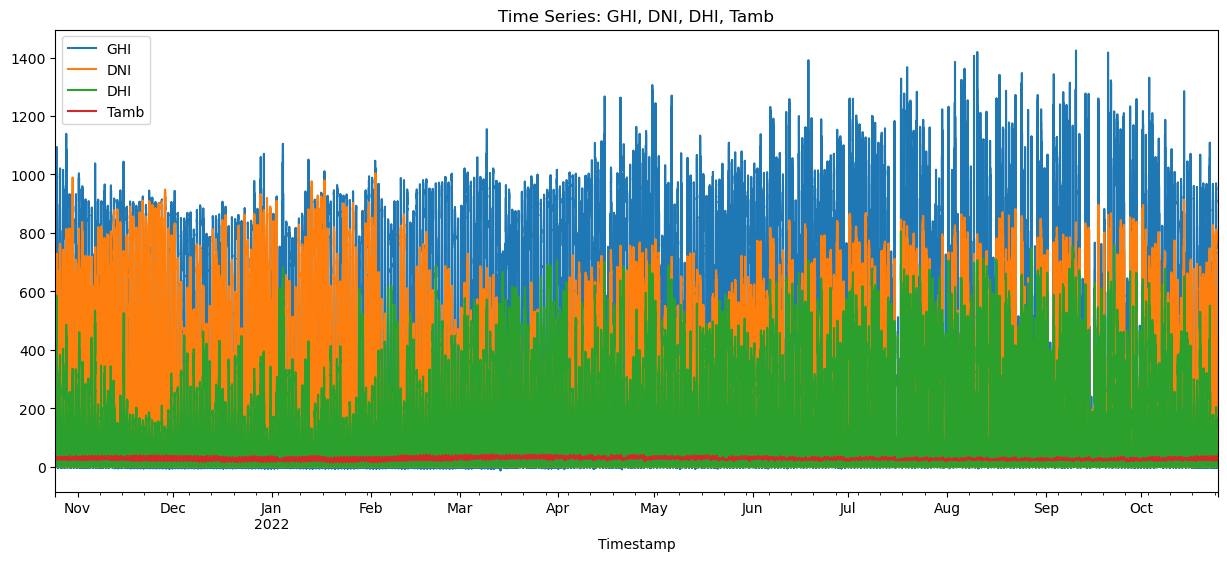

In [9]:
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
plt.show()

In [10]:
# to make plots look nicer
sns.set(style="whitegrid")

### Line Chart of Full Time Series

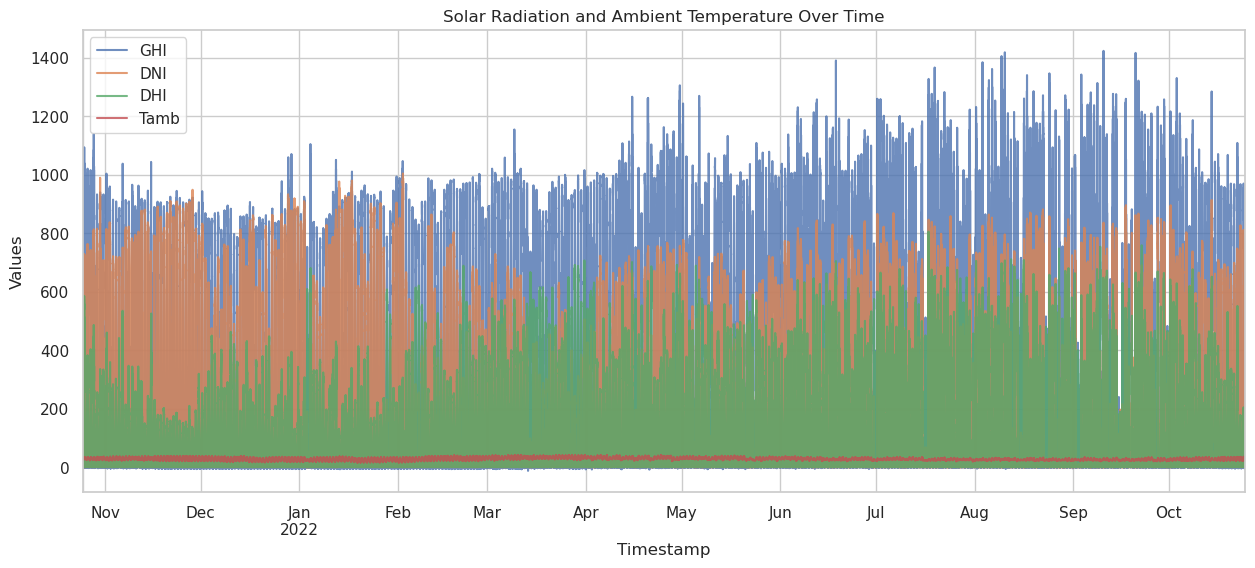

In [15]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 6), alpha=0.8)
plt.title("Solar Radiation and Ambient Temperature Over Time")
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.show()

### Monthly Pattern Overview

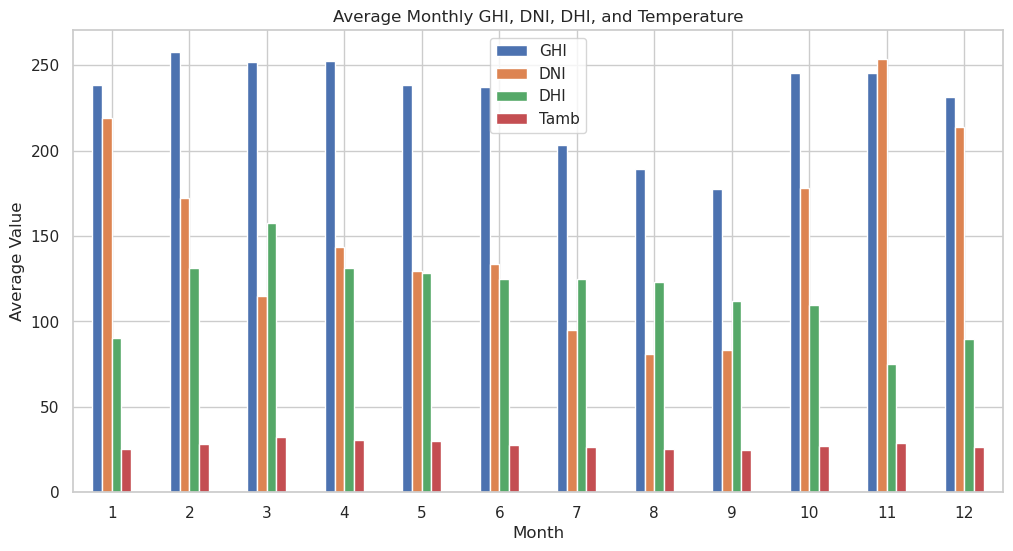

In [16]:
# Add a month column
df_clean['Month'] = df_clean.index.month

# Plot monthly average
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly GHI, DNI, DHI, and Temperature")
plt.ylabel("Average Value")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

### Daily Trend Pattern Overview

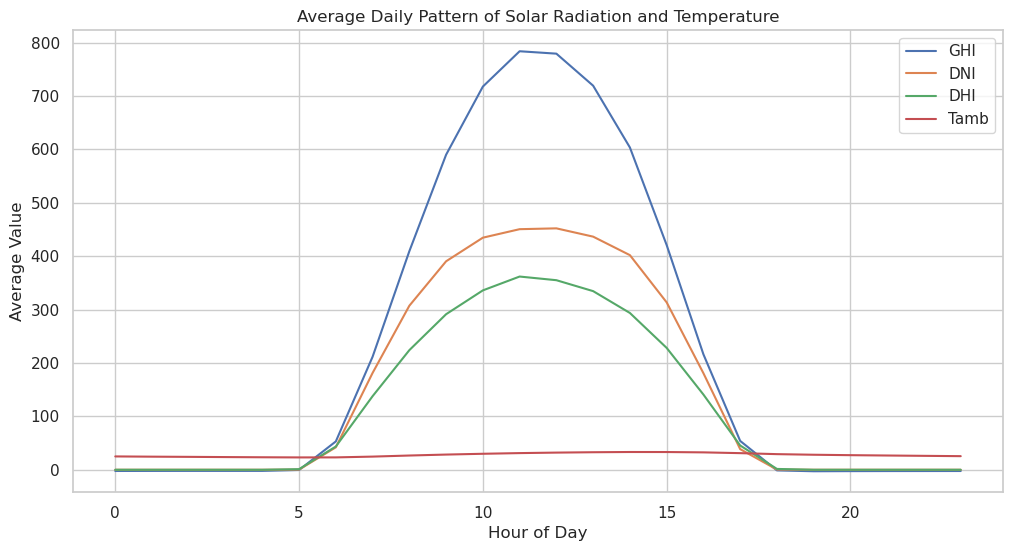

In [17]:
# Add hour column
df_clean['Hour'] = df_clean.index.hour

# Average by hour
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(12,6))
plt.title("Average Daily Pattern of Solar Radiation and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

## Cleaning Impact Analysis

In [20]:
# Check if Cleaning column is present and correctly typed
df_clean['Cleaning'] = df_clean['Cleaning'].fillna(0).astype(int)

# Group by Cleaning flag
mod_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

mod_avg.rename(columns={0: 'No Cleaning', 1: 'After Cleaning'}, inplace=True)
mod_avg


,Cleaning,ModA,ModB
0,0,225.979064,219.401351
1,1,535.186477,532.211744


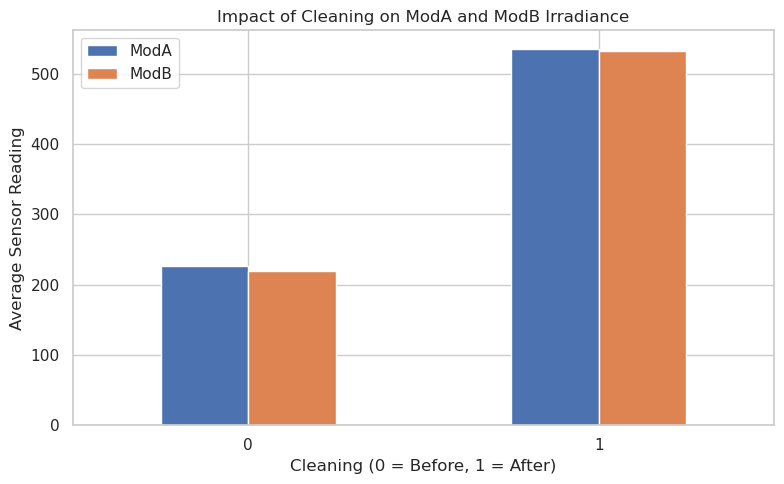

In [21]:

mod_avg.plot(
    kind='bar',
    x='Cleaning',
    figsize=(8, 5),
    title='Impact of Cleaning on ModA and ModB Irradiance',
    legend=True,
    rot=0
)

plt.xlabel("Cleaning (0 = Before, 1 = After)")
plt.ylabel("Average Sensor Reading")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation & Relationship Analysis

### Heatmap of correlations

<Axes: >

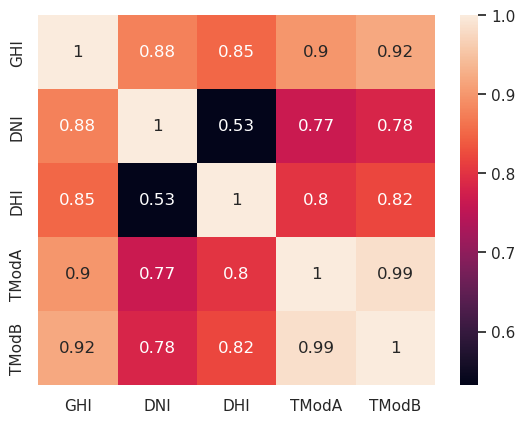

In [22]:
# Heatmap
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True)

### Scatter plots

<Axes: xlabel='WS', ylabel='GHI'>

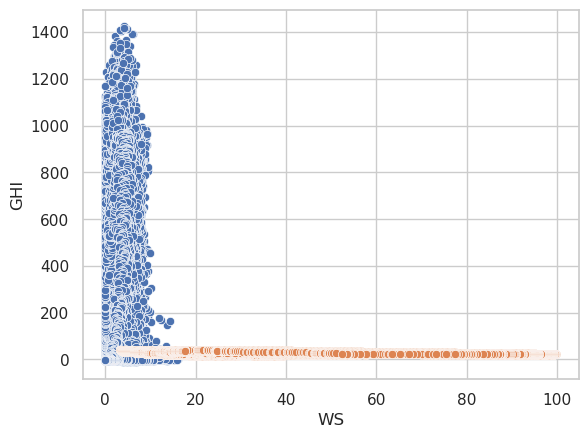

In [23]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')

<Axes: xlabel='WSgust', ylabel='GHI'>

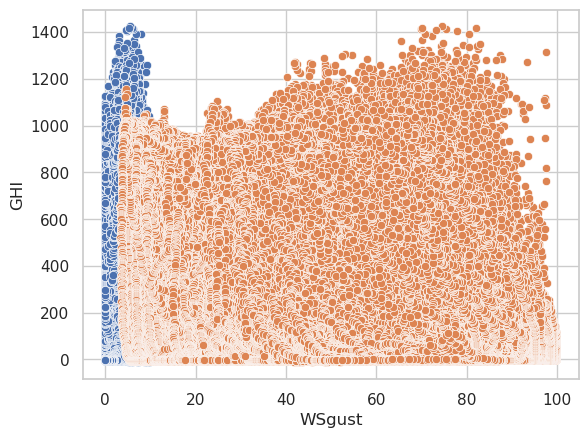

In [24]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='GHI')

<Axes: xlabel='WD', ylabel='GHI'>

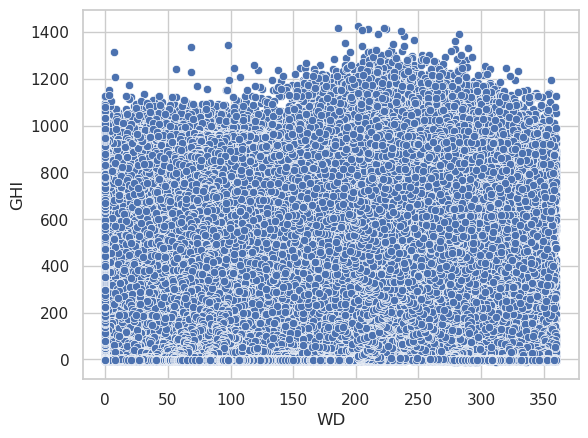

In [26]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WD', y='GHI')

## Wind & Distribution Analysis

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

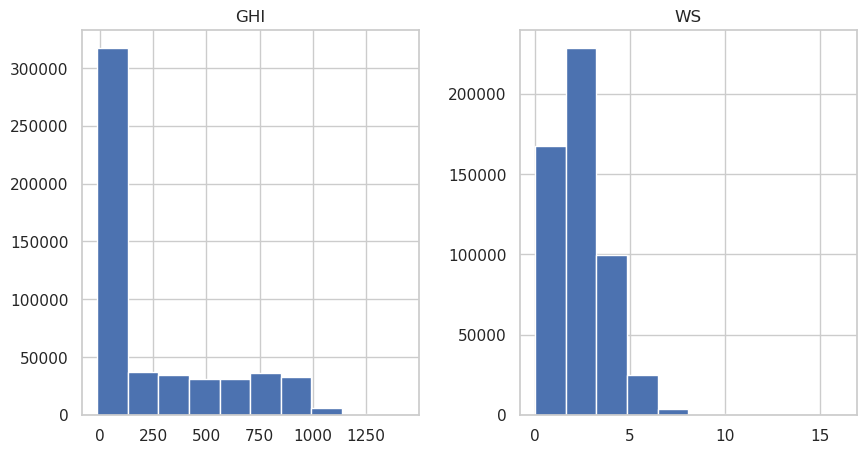

In [27]:
# Histogram of GHI and WS
df_clean[['GHI', 'WS']].hist(figsize=(10,5))

## Temperature Analysis

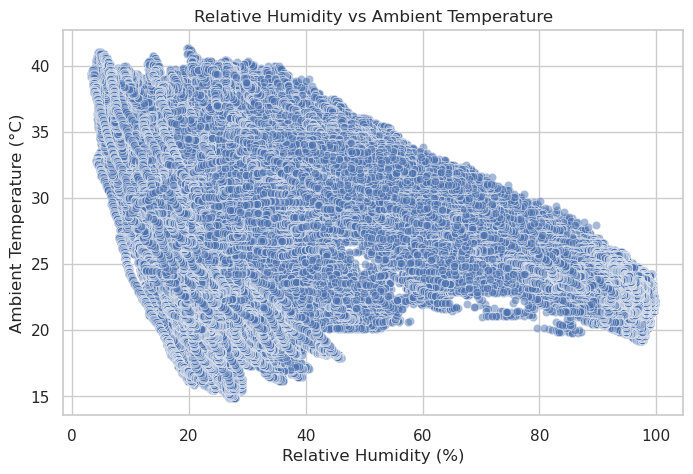

In [36]:
# Scatter Plot: RH vs Tamb
# This shows whether higher humidity correlates with cooler or warmer air temperatures.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.show()

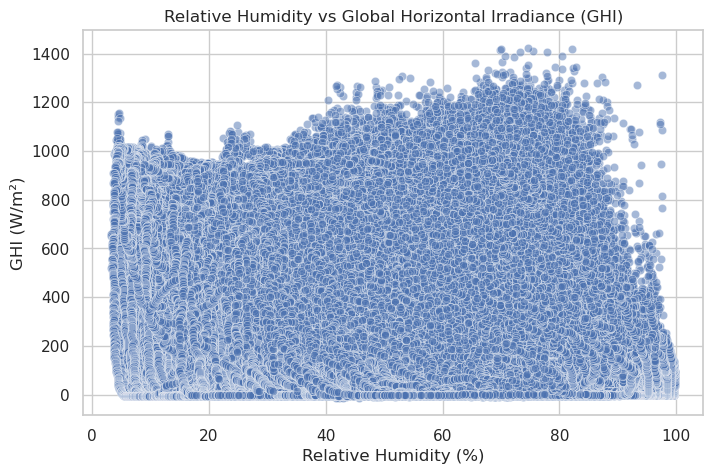

In [38]:
# Scatter Plot: RH vs GHI
# This shows if humidity influences solar irradiance. High RH could mean more cloud cover, reducing GHI.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


In [39]:
# Correlation Coefficients
#This gives a quick numerical insight into strength of relationships.

# Correlation values
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))

Correlation between RH and Tamb: -0.4004104673516289
Correlation between RH and GHI: -0.25807671855320236


A negative correlation between RH and GHI suggests high humidity blocks sunlight (common in cloud-prone regions).

A negative correlation between RH and Tamb suggests cooler temperatures in high-humidity areas.

## Bubble Chart

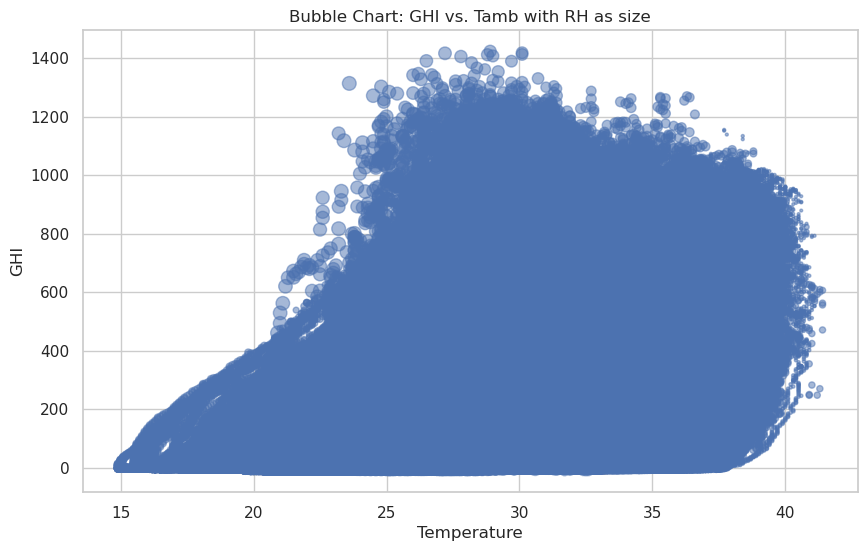

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs. Tamb with RH as size')
plt.show()